In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tobii_pytracker.analyze.data_loader import DataLoader
from tobii_pytracker.configs.custom_config import CustomConfig

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

from tobii_pytracker.analyze.models import (
    HeatmapAnalyzer,
    FocusMapAnalyzer,
    FixationAnalyzer,
    SaccadeAnalyzer,
    EntropyAnalyzer,
    ClusterAnalyzer,
    ConceptAnalyzer,
    ScanpathsAnalyzer,
    VoiceTranscription
)


config = CustomConfig('../configs/config.yaml')
loader = DataLoader(config, root='../')

▶ Global heatmap statistics


,avg_gaze_x,avg_gaze_y,gaze_count
0,-1.691886,-30.355547,2551


▶ Per-set statistics


,set_name,avg_gaze_x,avg_gaze_y,gaze_count
0,20251119_125207,-1.691886,-30.355547,2551


▶ Per-slide statistics


,set_name,slide_index,avg_gaze_x,avg_gaze_y,gaze_count
0,20251119_125207,0,27.343750,83.784722,288
1,20251119_125207,1,-17.869565,37.550725,207
2,20251119_125207,2,-30.415162,7.620939,277
3,20251119_125207,3,100.429224,-5.593607,219
4,20251119_125207,4,-90.900000,-56.081250,320


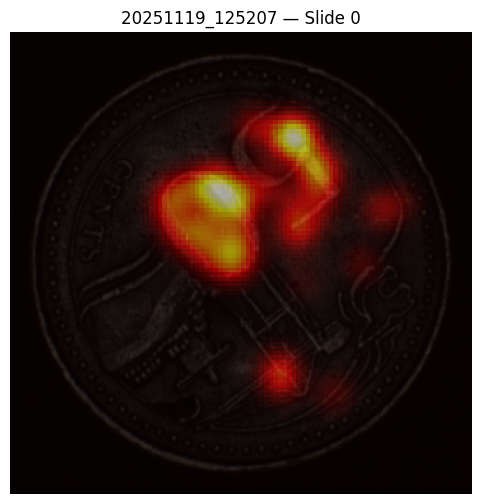

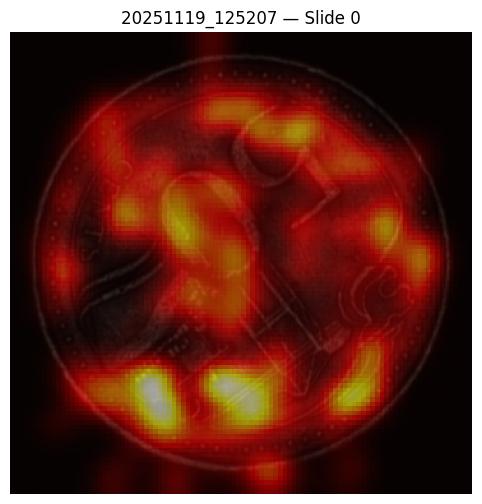

In [3]:
# Assuming you already have the data
background_data = pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

analyzer = HeatmapAnalyzer(output_folder=output_dir)

# --- Global ---
print("▶ Global heatmap statistics")
global_stats = analyzer.analyze(background_data, per="global")
display(global_stats)

# --- Set-level ---
print("▶ Per-set statistics")
set_stats = analyzer.analyze(background_data, per="set")
display(set_stats.head())

# --- Slide-level ---
print("▶ Per-slide statistics")
slide_stats = analyzer.analyze(background_data, per="slide")
display(slide_stats.head())

# --- Plot heatmap for one image ---
example_slide = background_data.iloc[0]
subset = background_data[
    (background_data["set_name"] == example_slide["set_name"]) &
    (background_data["slide_index"] == example_slide["slide_index"])
]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

analyzer.plot_analysis(
    background_data=subset,
    screenshot_path=screenshot_path,
    title=f"{example_slide['set_name']} — Slide {example_slide['slide_index']}",
)


analyzer.plot_analysis(
    background_data=background_data,
    screenshot_path=screenshot_path,
    title=f"{example_slide['set_name']} — Slide {example_slide['slide_index']}",
)


▶ Global focus map statistics


,avg_gaze_x,avg_gaze_y,gaze_count
0,-1.691886,-30.355547,2551


▶ Per-set statistics


,set_name,avg_gaze_x,avg_gaze_y,gaze_count
0,20251119_125207,-1.691886,-30.355547,2551


▶ Per-slide statistics


,set_name,slide_index,avg_gaze_x,avg_gaze_y,gaze_count
0,20251119_125207,0,27.343750,83.784722,288
1,20251119_125207,1,-17.869565,37.550725,207
2,20251119_125207,2,-30.415162,7.620939,277
3,20251119_125207,3,100.429224,-5.593607,219
4,20251119_125207,4,-90.900000,-56.081250,320


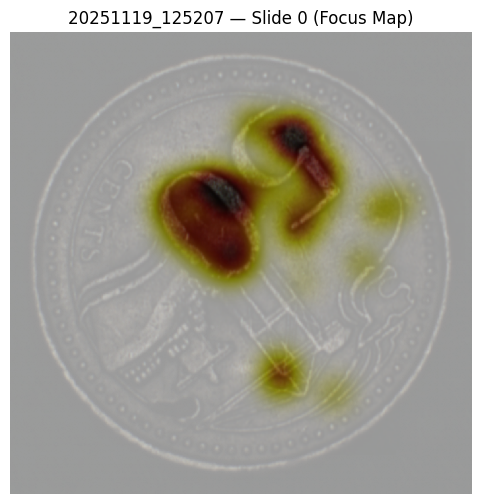

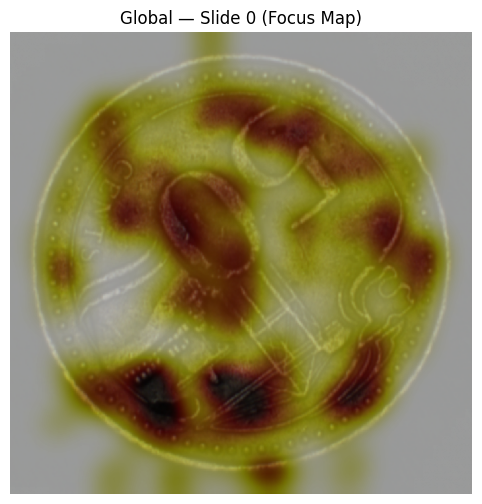

In [4]:
# --- Prepare background data ---
background_data = pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

analyzer = FocusMapAnalyzer(output_folder=output_dir)

# --- Global ---
print("▶ Global focus map statistics")
global_stats = analyzer.analyze(background_data, per="global")
display(global_stats)

# --- Set-level ---
print("▶ Per-set statistics")
set_stats = analyzer.analyze(background_data, per="set")
display(set_stats.head())

# --- Slide-level ---
print("▶ Per-slide statistics")
slide_stats = analyzer.analyze(background_data, per="slide")
display(slide_stats.head())

# ============================================================
# 🖼 Plot focus map for one example slide
# ============================================================

example_slide = background_data.iloc[0]
subset = background_data[
    (background_data["set_name"] == example_slide["set_name"]) &
    (background_data["slide_index"] == example_slide["slide_index"])
]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

# --- Focus map for single slide (individual subject) ---
analyzer.plot_analysis(
    background_data=subset,
    screenshot_path=screenshot_path,
    title=f"{example_slide['set_name']} — Slide {example_slide['slide_index']} (Focus Map)",
)

# --- Focus map using all gaze data for this slide (across subjects) ---
analyzer.plot_analysis(
    background_data=background_data,
    screenshot_path=screenshot_path,
    title=f"Global — Slide {example_slide['slide_index']} (Focus Map)",
)

▶ Detecting saccades...


,set_name,slide_index,start_time,end_time,duration,x_start,y_start,x_end,y_end,amplitude,peak_velocity,mean_velocity,mean_acceleration
0,20251119_125207,0,8.600876,8.619759,0.037420,-2.0,7.0,-6.0,5.0,4.472136,194.500407,123.729187,5116.008552
1,20251119_125207,0,8.886847,8.886847,0.031708,-14.0,-2.0,-16.0,-3.0,2.236068,70.521514,70.521514,3993.274171
2,20251119_125207,0,8.918557,8.934659,0.031789,-18.0,-4.0,-22.0,-5.0,4.123106,201.583309,131.843698,6308.055085
3,20251119_125207,0,8.983810,9.094922,0.128327,-26.0,-5.0,-47.0,16.0,29.698485,478.418128,222.085075,10179.335634
4,20251119_125207,0,9.158817,9.465447,0.322518,-55.0,19.0,-98.0,52.0,54.203321,423.908439,278.459430,6713.190928


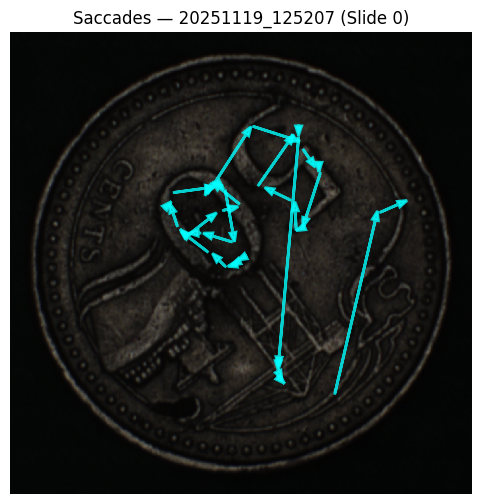

In [5]:
background_data = pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

saccade_analyzer = SaccadeAnalyzer(
    output_folder=output_dir,
    method="ivt",               # "ivt" (velocity-based) or "acceleration"
    velocity_threshold=120.0,   # pixels/sec
    acceleration_threshold=6000.0,  # pixels/sec^2
    min_duration=0.015,         # seconds
)

print("▶ Detecting saccades...")
saccades = saccade_analyzer.analyze(background_data)
display(saccades.head())

example_slide = background_data.iloc[0]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

saccade_analyzer.plot_analysis(
    saccades=saccades,
    screenshot_path=screenshot_path,
    set_name=example_slide["set_name"],
    slide_index=example_slide["slide_index"],
    title=f"Saccades — {example_slide['set_name']} (Slide {example_slide['slide_index']})",
)

▶ Detecting fixations...


,fix_start,fix_end,duration,x_mean,y_mean,dispersion,set_name,slide_index
0,8.503905,9.046875,0.542970,-14.947368,2.263158,62.0,20251119_125207,0
1,9.062872,9.417486,0.354613,-61.900000,22.200000,82.0,20251119_125207,0
2,9.433998,9.657946,0.223948,-108.916667,71.166667,62.0,20251119_125207,0
3,9.673505,10.024725,0.351219,-105.333333,110.933333,64.0,20251119_125207,0
4,10.040960,10.297005,0.256045,-42.000000,121.461538,64.0,20251119_125207,0


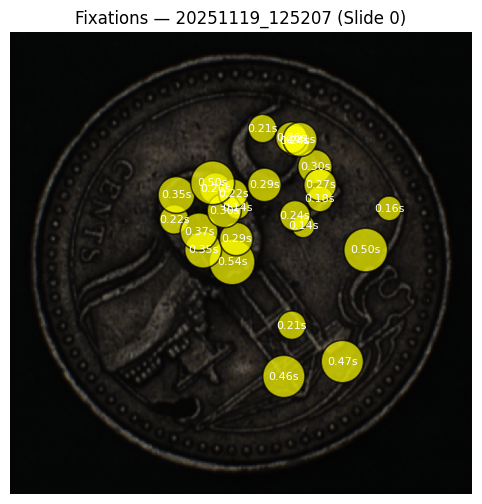

In [6]:
background_data = pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

fixation_analyzer = FixationAnalyzer(
    output_folder=output_dir,
    method="dispersion",           # or "velocity"
    dispersion_threshold=60.0,     # pixels
    min_duration=0.08,             # seconds
)

print("▶ Detecting fixations...")
fixations = fixation_analyzer.analyze(background_data)
display(fixations.head())

example_slide = background_data.iloc[0]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

fixation_analyzer.plot_analysis(
    fixations=fixations,
    screenshot_path=screenshot_path,
    set_name=example_slide["set_name"],
    slide_index=example_slide["slide_index"],
    title=f"Fixations — {example_slide['set_name']} (Slide {example_slide['slide_index']})",
)

▶ Performing gaze clustering...


,set_name,slide_index,screenshot_file,input_data,classification,user_classification,model_prediction,voice_file,voice_start_timestamp,event_type,...,gaze_x_left,gaze_y_left,gaze_x_right,gaze_y_right,pupil_left,pupil_right,avg_gaze_x,avg_gaze_y,avg_pupil_size,cluster
0,20251119_125207,0,output\20251119_125207\CAM1-20250304 181251538...,datasets/pdt\Discolored\CAM1-20250304 18125153...,discolored,discolored,None,NaN,NaN,MonocularEyeSampleEventNT,...,2.0,9.0,None,None,5,0,2.0,9.0,2.5,0
1,20251119_125207,0,output\20251119_125207\CAM1-20250304 181251538...,datasets/pdt\Discolored\CAM1-20250304 18125153...,discolored,discolored,None,NaN,NaN,MonocularEyeSampleEventNT,...,2.0,9.0,None,None,5,0,2.0,9.0,2.5,0
2,20251119_125207,0,output\20251119_125207\CAM1-20250304 181251538...,datasets/pdt\Discolored\CAM1-20250304 18125153...,discolored,discolored,None,NaN,NaN,MonocularEyeSampleEventNT,...,2.0,9.0,None,None,5,0,2.0,9.0,2.5,0
3,20251119_125207,0,output\20251119_125207\CAM1-20250304 181251538...,datasets/pdt\Discolored\CAM1-20250304 18125153...,discolored,discolored,None,NaN,NaN,MonocularEyeSampleEventNT,...,2.0,9.0,None,None,5,0,2.0,9.0,2.5,0
4,20251119_125207,0,output\20251119_125207\CAM1-20250304 181251538...,datasets/pdt\Discolored\CAM1-20250304 18125153...,discolored,discolored,None,NaN,NaN,MonocularEyeSampleEventNT,...,-2.0,7.0,None,None,5,0,-2.0,7.0,2.5,0


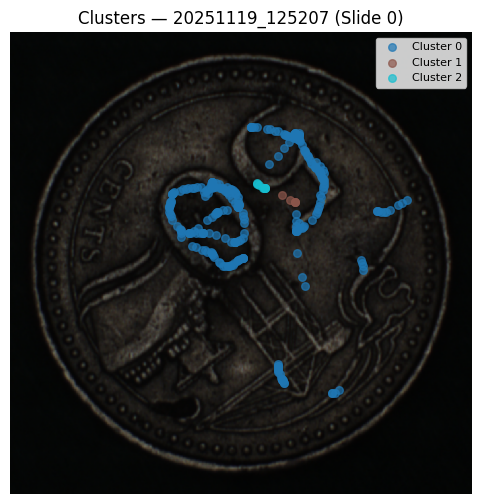

In [15]:
# ==============================================
# 👁️ Cluster Analyzer Demo
# ==============================================
from pathlib import Path
import pandas as pd

background_data= pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

# Instantiate analyzer (DBSCAN by default)
cluster_analyzer = ClusterAnalyzer(
    output_folder=output_dir,
    eps=20,              # pixel distance for clustering
    min_samples=3,        # minimum points per cluster
)

print("▶ Performing gaze clustering...")
clustered_data = cluster_analyzer.analyze(background_data)
display(clustered_data.head())

# --- Visualization for one slide ---
example_slide = background_data.iloc[0]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

cluster_analyzer.plot_analysis(
    background_data=clustered_data,
    screenshot_path=screenshot_path,
    set_name=example_slide["set_name"],
    slide_index=example_slide["slide_index"],
    title=f"Clusters — {example_slide['set_name']} (Slide {example_slide['slide_index']})",
)

▶ Slide-level entropy


,entropy,convex_hull_area,num_points,set_name,slide_index
0,7.397499,101643.0,288,20251119_125207,0
1,6.960088,213872.0,207,20251119_125207,1
2,7.338558,109275.0,277,20251119_125207,2
3,7.183801,154764.5,219,20251119_125207,3
4,7.458721,176896.0,320,20251119_125207,4


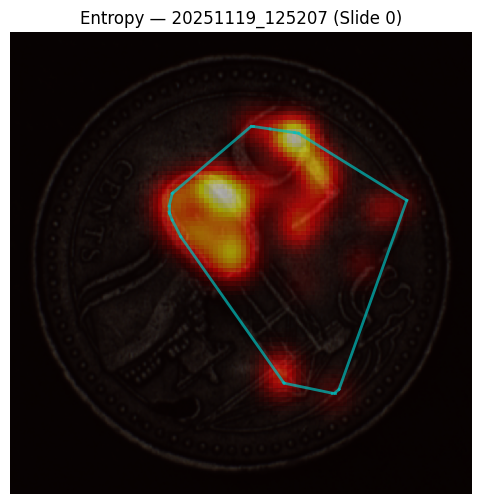

In [8]:
# ==============================================
# 🧠 Entropy Analyzer Demo
# ==============================================
background_data = pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

entropy_analyzer = EntropyAnalyzer(output_folder=output_dir)

print("▶ Slide-level entropy")
entropy_results = entropy_analyzer.analyze(background_data, per="slide", bins=100, use_convex_hull=True)
display(entropy_results.head())

# --- Visualization for one example slide ---
example_slide = background_data.iloc[0]
subset = background_data[
    (background_data["set_name"] == example_slide["set_name"]) &
    (background_data["slide_index"] == example_slide["slide_index"])
]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

entropy_analyzer.plot_analysis(
    background_data=subset,
    screenshot_path=screenshot_path,
    title=f"Entropy — {example_slide['set_name']} (Slide {example_slide['slide_index']})",
)
